В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [14]:
!rm process_bank_churn.py
!wget https://raw.githubusercontent.com/kalashnikovayana/Python-for-ML-Home-Work/main/process_bank_churn.py

rm: cannot remove 'process_bank_churn.py': No such file or directory
--2025-07-06 19:14:50--  https://raw.githubusercontent.com/kalashnikovayana/Python-for-ML-Home-Work/main/process_bank_churn.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2536 (2.5K) [text/plain]
Saving to: ‘process_bank_churn.py’

process_bank_churn. 100%[===================>]   2.48K  --.-KB/s    in 0s      

2025-07-06 19:14:50 (36.6 MB/s) - ‘process_bank_churn.py’ saved [2536/2536]



In [16]:
import importlib.util
import sys

# Завантажуємо файл як модуль
spec = importlib.util.spec_from_file_location("process_bank_churn", "process_bank_churn.py")
module = importlib.util.module_from_spec(spec)
sys.modules["process_bank_churn"] = module
spec.loader.exec_module(module)

# Імпортуємо функції
preprocess_data = module.preprocess_data
preprocess_new_data = module.preprocess_new_data

In [17]:
from process_bank_churn import preprocess_data, preprocess_new_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [26]:
!pip install opendatasets --upgrade --quiet
import opendatasets as od

dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-3'

In [27]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yanakalashnikova
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 403MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-3/bank-customer-churn-prediction-dlu-course-c-3.zip to ./bank-customer-churn-prediction-dlu-course-c-3


In [30]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [31]:
# 1. Завантаження CSV
train_df = pd.read_csv("bank-customer-churn-prediction-dlu-course-c-3/train.csv")
test_df = pd.read_csv("bank-customer-churn-prediction-dlu-course-c-3/test.csv")

# 2. Передобробка та навчання
X_train, y_train, X_val, y_val, input_cols, scaler, encoder = preprocess_data(train_df)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 3. Передбачення
X_test = preprocess_new_data(test_df, input_cols, scaler, encoder)
preds = model.predict(X_test)

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Ініціалізуємо дерево
tree_model = DecisionTreeClassifier(random_state=42)

# Тренуємо на тренувальних даних
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
from sklearn.metrics import roc_auc_score

# Отримаємо ймовірності для класу 1
train_probs = tree_model.predict_proba(X_train)[:, 1]
val_probs = tree_model.predict_proba(X_val)[:, 1]

# Розрахунок ROC-AUC
train_auc = roc_auc_score(y_train, train_probs)
val_auc = roc_auc_score(y_val, val_probs)

print(f"Train AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")

Train AUC: 1.0000
Validation AUC: 0.7768


Модель перенавчена — на тренуванні 1.0, а на валідації 0.77.

In [36]:
print("Depth of tree:", tree_model.get_depth())

Depth of tree: 26


In [38]:
# Створюємо shallow tree
tree_small = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_small.fit(X_train, y_train)

print("Depth:", tree_small.get_depth())
print("Top features at depth 2:")

Depth: 2
Top features at depth 2:


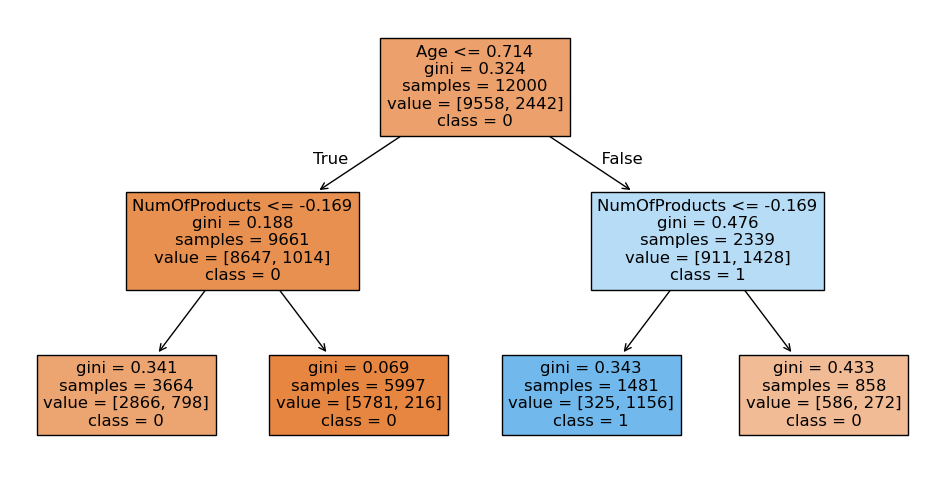

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(tree_small, feature_names=X_train.columns, class_names=["0", "1"], filled=True)
plt.show()

Візуально видно, що найвпливовіші:

Age

NumOfProducts

In [40]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree_model.feature_importances_
})

# Сортуємо за важливістю
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Виводимо топ-10
top_10 = importance_df.head(10)
print(top_10)

              feature  importance
1                 Age    0.354194
4       NumOfProducts    0.168379
7     EstimatedSalary    0.127802
0         CreditScore    0.123544
3             Balance    0.079601
2              Tenure    0.055563
6      IsActiveMember    0.033185
10        Gender_Male    0.018676
8   Geography_Germany    0.016288
5           HasCrCard    0.012669


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Значення max_depth і max_leaf_nodes
tree_best = DecisionTreeClassifier(
    max_depth=5,            # глибина дерева
    max_leaf_nodes=20,      # кількість листових вузлів
    random_state=42
)

# Навчання
tree_best.fit(X_train, y_train)

# Прогноз
train_probs = tree_best.predict_proba(X_train)[:, 1]
val_probs = tree_best.predict_proba(X_val)[:, 1]

# AUC
train_auc = roc_auc_score(y_train, train_probs)
val_auc = roc_auc_score(y_val, val_probs)

# Вивід
print(f"Train AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")


Train AUC: 0.9163
Validation AUC: 0.9160


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Значення max_depth і max_leaf_nodes
tree_best = DecisionTreeClassifier(
    max_depth=15,            # глибина дерева
    max_leaf_nodes=50,      # кількість листових вузлів
    random_state=42
)

# Навчання
tree_best.fit(X_train, y_train)

# Прогноз
train_probs = tree_best.predict_proba(X_train)[:, 1]
val_probs = tree_best.predict_proba(X_val)[:, 1]

# AUC
train_auc = roc_auc_score(y_train, train_probs)
val_auc = roc_auc_score(y_val, val_probs)

# Вивід
print(f"Train AUC: {train_auc:.4f}")
print(f"Validation AUC: {val_auc:.4f}")


Train AUC: 0.9312
Validation AUC: 0.9238


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

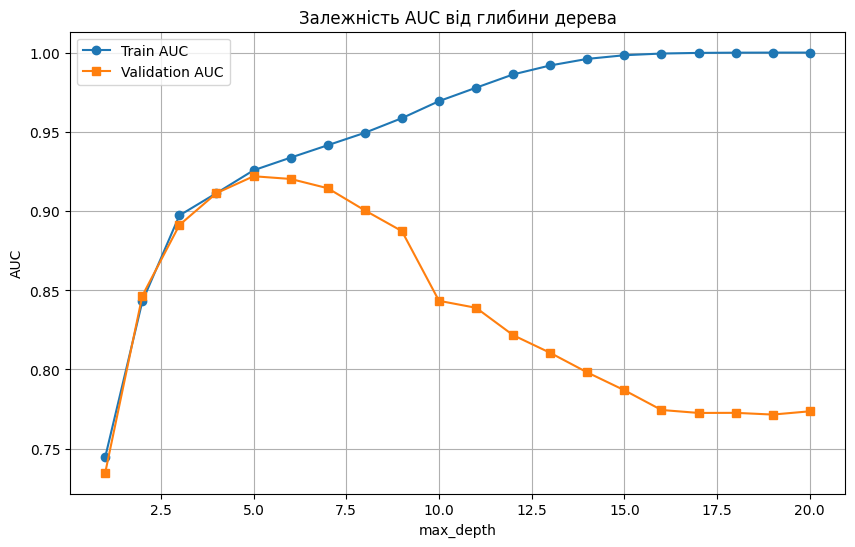

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

train_aucs = []
val_aucs = []
depths = range(1, 21)

for depth in depths:
    # 1. Створюємо і тренуємо модель з max_depth
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # 2. Отримуємо ймовірності для класу 1
    train_probs = model.predict_proba(X_train)[:, 1]
    val_probs = model.predict_proba(X_val)[:, 1]

    # 3. Обчислюємо AUC
    train_auc = roc_auc_score(y_train, train_probs)
    val_auc = roc_auc_score(y_val, val_probs)

    # 4. Додаємо в списки
    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(depths, train_aucs, marker='o', label='Train AUC')
plt.plot(depths, val_aucs, marker='s', label='Validation AUC')
plt.xlabel("max_depth")
plt.ylabel("AUC")
plt.title("Залежність AUC від глибини дерева")
plt.legend()
plt.grid(True)
plt.show()

Найкращі результати модель показує при max_depth=5. У цей момент AUROC на валідаційній вибірці максимальний, що свідчить про найкращий баланс між точністю і здатністю до узагальнення. Після цієї точки спостерігається перенавчання.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [44]:
from sklearn.tree import DecisionTreeClassifier

tree_final = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_final.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [45]:
test_df = pd.read_csv("bank-customer-churn-prediction-dlu-course-c-3/test.csv")

In [46]:
X_test = preprocess_new_data(test_df, input_cols, scaler, encoder)

In [47]:
test_probs = tree_final.predict_proba(X_test)[:, 1]  # Прогноз імовірності класу 1

In [48]:
submission = pd.DataFrame({
    'id': test_df['id'],
    'prediction': test_probs
})

submission.to_csv('submission.csv', index=False)